In [238]:
# Imports
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn import dummy
from sklearn.metrics import r2_score, mean_squared_error, make_scorer

In [239]:
# Fichier source
data = pd.read_csv('winequality-red.csv', sep=";")

X = data.as_matrix(data.columns[:-1])
y = data.as_matrix([data.columns[-1]])
y = y.flatten()

In [240]:
# Séparation training/testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

# Scaling
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [241]:
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    #print('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     #print('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    #set score here and not below if using MSE in GridCV
    score = MSE(y_true,y_pred)
    R2(y_true,y_pred)
    return score

def two_scorer():
    # greater_is_better=False pour le MSE
    # greater_is_better=True pour le R2
    return make_scorer(two_score, greater_is_better=False)

In [296]:
model = neighbors.KNeighborsClassifier()
axe_X = range(3,30)
param_grid = {'n_neighbors':axe_X }

In [297]:
score = 'neg_mean_squared_error'

clf = model_selection.GridSearchCV(model, param_grid, cv=6, scoring=score, refit=True)

clf.fit(X_train, y_train)
best_params = clf.best_params_
score = clf.best_score_

score_MSE = []

for a, c in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['params']):
    print("\t%s %s %s pour %s" % ('\tGRIDSCORES\t',  "MSE" , a, c))
    score_MSE.append(abs(a))

print('\n\t\t%s\t%f' % (str(best_params), abs(score)))

		GRIDSCORES	 MSE -0.970509383378 pour {'n_neighbors': 3}
		GRIDSCORES	 MSE -0.845397676497 pour {'n_neighbors': 4}
		GRIDSCORES	 MSE -0.828418230563 pour {'n_neighbors': 5}
		GRIDSCORES	 MSE -0.823949955317 pour {'n_neighbors': 6}
		GRIDSCORES	 MSE -0.815013404826 pour {'n_neighbors': 7}
		GRIDSCORES	 MSE -0.794459338695 pour {'n_neighbors': 8}
		GRIDSCORES	 MSE -0.7890974084 pour {'n_neighbors': 9}
		GRIDSCORES	 MSE -0.758713136729 pour {'n_neighbors': 10}
		GRIDSCORES	 MSE -0.741733690795 pour {'n_neighbors': 11}
		GRIDSCORES	 MSE -0.729222520107 pour {'n_neighbors': 12}
		GRIDSCORES	 MSE -0.755138516533 pour {'n_neighbors': 13}
		GRIDSCORES	 MSE -0.728328865058 pour {'n_neighbors': 14}
		GRIDSCORES	 MSE -0.72654155496 pour {'n_neighbors': 15}
		GRIDSCORES	 MSE -0.731903485255 pour {'n_neighbors': 16}
		GRIDSCORES	 MSE -0.739946380697 pour {'n_neighbors': 17}
		GRIDSCORES	 MSE -0.725647899911 pour {'n_neighbors': 18}
		GRIDSCORES	 MSE -0.70509383378 pour {'n_neighbors': 19}
		GRIDSC

In [298]:
score = 'r2'

clf2 = model_selection.GridSearchCV(model, param_grid, cv=6, scoring=score, refit=True)

clf2.fit(X_train, y_train)
best_params = clf2.best_params_
score = clf2.best_score_

score_r2 = []

for a, c in zip(clf2.cv_results_['mean_test_score'], clf2.cv_results_['params']):
    print("\t%s %s %s pour %s" % ('\tGRIDSCORES\t',  "R2" , a, c))
    score_r2.append(abs(a))

print('\n\t\t%s\t%f' % (str(best_params), abs(score)))

		GRIDSCORES	 R2 -0.483491441463 pour {'n_neighbors': 3}
		GRIDSCORES	 R2 -0.292069001479 pour {'n_neighbors': 4}
		GRIDSCORES	 R2 -0.265914906306 pour {'n_neighbors': 5}
		GRIDSCORES	 R2 -0.257933586499 pour {'n_neighbors': 6}
		GRIDSCORES	 R2 -0.2454667587 pour {'n_neighbors': 7}
		GRIDSCORES	 R2 -0.212518517621 pour {'n_neighbors': 8}
		GRIDSCORES	 R2 -0.205325616366 pour {'n_neighbors': 9}
		GRIDSCORES	 R2 -0.158634813864 pour {'n_neighbors': 10}
		GRIDSCORES	 R2 -0.13264503212 pour {'n_neighbors': 11}
		GRIDSCORES	 R2 -0.113640091233 pour {'n_neighbors': 12}
		GRIDSCORES	 R2 -0.153174999789 pour {'n_neighbors': 13}
		GRIDSCORES	 R2 -0.111440571348 pour {'n_neighbors': 14}
		GRIDSCORES	 R2 -0.109380984378 pour {'n_neighbors': 15}
		GRIDSCORES	 R2 -0.118001713142 pour {'n_neighbors': 16}
		GRIDSCORES	 R2 -0.130566877229 pour {'n_neighbors': 17}
		GRIDSCORES	 R2 -0.107935696079 pour {'n_neighbors': 18}
		GRIDSCORES	 R2 -0.075908961544 pour {'n_neighbors': 19}
		GRIDSCORES	 R2 -0.0919

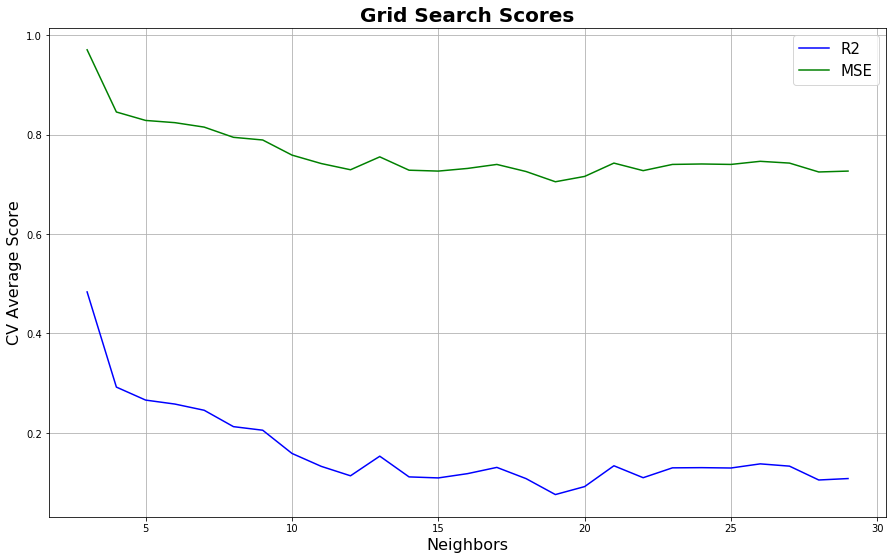

In [299]:
plt.figure(1, figsize=(15, 9))
            
plt.plot(axe_X, score_r2, label="R2", color='b')
plt.plot(axe_X, score_MSE, label="MSE", color='g')

plt.title("Grid Search Scores", fontsize=20, fontweight='bold')
plt.xlabel(name_param_1, fontsize=16)
plt.ylabel('CV Average Score', fontsize=16)
plt.legend(loc="best", fontsize=15)
plt.grid('on')
plt.show()

In [313]:
# Prédiction aléatoire
y_pred_random = np.random.randint(np.min(y), np.max(y), len(X_test))

print("MSE : %.2f" % metrics.mean_squared_error(y_test, y_pred_random))

MSE : 3.06


In [312]:
# Prédiction suivant la valeur moyenne
dum = dummy.DummyRegressor(strategy='mean')
dum.fit(X_train_std, y_train)
y_pred_dum = dum.predict(X_test)

print("MSE : %.2f" % metrics.mean_squared_error(y_test, y_pred_dum))

MSE : 0.64


In [311]:
y_pred = clf.predict(X_test)

print("MSE : %.2f" % metrics.mean_squared_error(y_test, y_pred))

MSE : 0.76


In [307]:
grid.cv_results_['params'][grid.best_index_]

{'n_neighbors': 19}

In [308]:
y_pred

array([6, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 6,
       6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 7,
       5, 6, 6, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 7, 5, 7, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 7, 6, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5,
       5, 6, 6, 5, 5, 7, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 5,
       5, 7, 7, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5,
       7, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6,
       5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 6,
       6, 6,